# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import sklearn
plt.style.use('bmh')

# 01 Read in Sample data and Adjust for Time Zone

In [2]:
#A. Read in file
filepath = "../Data/mergedSample.csv"
data = pd.read_csv(filepath)
data = data.rename(columns = {"demand": "mw"})

In [3]:
data.head()

,Unnamed: 0,datetime,mw,abbr,datetime_utc,date,hour,usaf,wban,windir,windspeed,skycond,tempc,dewpoint,tempf
0,0,2018-10-14 00:00:00,10443.0,ISNE,2018-10-14 05:00:00,2018-10-14,0,725090,14739,999,NaN,99999,NaN,NaN,NaN
1,1,2018-10-13 23:00:00,10884.0,ISNE,2018-10-14 04:00:00,2018-10-13,23,725090,14739,310,31.0,22000,8.3,39.92,46.94
2,2,2018-10-13 22:00:00,11436.0,ISNE,2018-10-14 03:00:00,2018-10-13,22,725090,14739,290,41.0,22000,9.4,39.92,48.92
3,3,2018-10-13 21:00:00,12203.0,ISNE,2018-10-14 02:00:00,2018-10-13,21,725090,14739,280,46.0,22000,10.6,39.92,51.08
4,4,2018-10-13 20:00:00,12774.0,ISNE,2018-10-14 01:00:00,2018-10-13,20,725090,14739,280,31.0,22000,10.6,39.92,51.08


In [4]:
data['datetime'] = pd.to_datetime(data.datetime)  # Convert to datetime object
data.datetime.asfreq("H")  #  informs data is hourly

1970-01-01   NaT
Freq: H, Name: datetime, dtype: datetime64[ns]

In [5]:
#C. Summarize dataset info
print(data.columns)
data.describe()

Index(['Unnamed: 0', 'datetime', 'mw', 'abbr', 'datetime_utc', 'date', 'hour',
       'usaf', 'wban', 'windir', 'windspeed', 'skycond', 'tempc', 'dewpoint',
       'tempf'],
      dtype='object')


,Unnamed: 0,mw,hour,usaf,wban,windir,windspeed,skycond,tempc,dewpoint,tempf
count,23745.000000,23745.000000,23745.000000,23745.0,23745.0,23745.000000,23737.000000,23745.000000,23744.000000,23740.000000,23744.000000
mean,11872.000000,14088.013813,11.495683,725090.0,14739.0,234.813813,50.274424,11532.829522,11.721210,41.204847,53.098177
std,6854.735407,2580.859962,6.926792,0.0,0.0,175.869372,24.696145,9790.037012,10.068497,19.327501,18.123294
min,0.000000,9016.000000,0.000000,725090.0,14739.0,10.000000,0.000000,30.000000,-22.800000,-25.060000,-9.040000
25%,5936.000000,12255.000000,5.000000,725090.0,14739.0,130.000000,31.000000,1524.000000,3.900000,28.040000,39.020000
50%,11872.000000,13786.000000,11.000000,725090.0,14739.0,220.000000,46.000000,7620.000000,11.700000,44.060000,53.060000
75%,17808.000000,15526.000000,18.000000,725090.0,14739.0,290.000000,67.000000,22000.000000,20.000000,57.020000,68.000000
max,23744.000000,25463.000000,23.000000,725090.0,14739.0,999.000000,216.000000,99999.000000,36.100000,78.080000,96.980000


# Define Features

In [6]:
#A. Extract additional time variables 

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['dayofweek'] = data['datetime'].dt.dayofweek
data['dayofyear'] = data['datetime'].dt.dayofyear
data['date'] = data['datetime'].dt.date
data['hour'] = data['datetime'].dt.hour   

In [7]:
#B. Extract peak and average info

dategroup = data.groupby(by = 'date')
#data = dategroup.mw.mean()
data = data.join(data.groupby('date')['mw'].max(), on = 'date', rsuffix='_avg')
data = data.join(data.groupby('date')['mw'].max(), on = 'date', rsuffix='_peak')
data = data.join(data.groupby('date')['tempf'].max(), on = 'date', rsuffix='_peak')
data = data.join(data.groupby('date')['tempf'].mean(), on = 'date', rsuffix='_avg')

In [8]:
data.head()

,Unnamed: 0,datetime,mw,abbr,datetime_utc,date,hour,usaf,wban,windir,...,dewpoint,tempf,year,month,dayofweek,dayofyear,mw_avg,mw_peak,tempf_peak,tempf_avg
0,0,2018-10-14 00:00:00,10443.0,ISNE,2018-10-14 05:00:00,2018-10-14,0,725090,14739,999,...,NaN,NaN,2018,10,6,287,10443.0,10443.0,NaN,NaN
1,1,2018-10-13 23:00:00,10884.0,ISNE,2018-10-14 04:00:00,2018-10-13,23,725090,14739,310,...,39.92,46.94,2018,10,5,286,13212.0,13212.0,53.96,50.572727
2,2,2018-10-13 22:00:00,11436.0,ISNE,2018-10-14 03:00:00,2018-10-13,22,725090,14739,290,...,39.92,48.92,2018,10,5,286,13212.0,13212.0,53.96,50.572727
3,3,2018-10-13 21:00:00,12203.0,ISNE,2018-10-14 02:00:00,2018-10-13,21,725090,14739,280,...,39.92,51.08,2018,10,5,286,13212.0,13212.0,53.96,50.572727
4,4,2018-10-13 20:00:00,12774.0,ISNE,2018-10-14 01:00:00,2018-10-13,20,725090,14739,280,...,39.92,51.08,2018,10,5,286,13212.0,13212.0,53.96,50.572727


In [9]:
#C. Extract lags for weather and MW
data['mw_3hrlag'] = data.mw.shift(3)
data['mw_24hrlag'] = data.mw.shift(24)
data['mw_weeklag'] = data.mw.shift(168)
data['tempf_3hrlag'] = data.tempf.shift(3)
data['tempf_24hrlag'] = data.tempf.shift(24)
data['tempf_weeklag'] = data.tempf.shift(168)

#D. Rolling averages of temperature
data['tempf_3hrma'] = data.tempf.rolling(3).mean()
data['tempf_24hrma'] = data.tempf.rolling(24).mean()
data['tempf_weeklag'] = data.tempf.rolling(168).mean()

In [10]:
# Create Traditional weather variable

# CDD
data['cdd60_temp'] =  data['tempf_avg'] -60
data['zero'] = 0 
data['cdd60'] = data[['zero', 'cdd60_temp']].max(axis=1)
del data['cdd60_temp']

# HDD 
data['hdd60_temp'] =  data['tempf_avg'] -60
data['hdd60'] = data[['zero', 'hdd60_temp']].max(axis=1)
del data['hdd60_temp']

# CDH
data['cdh65_temp'] =  data['tempf']-65
data['cdh65'] = data[['zero', 'cdh65_temp']].max(axis=1)
del data['cdh65_temp']

# CDD 
data['hdh65_temp'] =  data['tempf_avg'] -60
data['zero'] = 0 
data['hdh65'] = data[['zero', 'hdh65_temp']].max(axis=1)
del data['hdh65_temp']
del data['zero']


#Remove obs with blank data
data.dropna(how = 'any', inplace = True)
data.head()

,Unnamed: 0,datetime,mw,abbr,datetime_utc,date,hour,usaf,wban,windir,...,mw_weeklag,tempf_3hrlag,tempf_24hrlag,tempf_weeklag,tempf_3hrma,tempf_24hrma,cdd60,hdd60,cdh65,hdh65
168,168,2018-10-06 15:00:00,11971.0,ISNE,2018-10-06 20:00:00,2018-10-06,15,725090,14739,90,...,10443.0,62.06,66.92,62.574286,61.04,66.1400,0.0,0.0,0.0,0.0
169,169,2018-10-06 14:00:00,11813.0,ISNE,2018-10-06 19:00:00,2018-10-06,14,725090,14739,80,...,10884.0,62.06,78.08,62.657857,60.68,65.4275,0.0,0.0,0.0,0.0
170,170,2018-10-06 13:00:00,11461.0,ISNE,2018-10-06 18:00:00,2018-10-06,13,725090,14739,110,...,11436.0,60.98,78.08,62.729643,60.68,64.7150,0.0,0.0,0.0,0.0
171,171,2018-10-06 12:00:00,11388.0,ISNE,2018-10-06 17:00:00,2018-10-06,12,725090,14739,110,...,12203.0,60.08,78.80,62.788571,60.98,63.9725,0.0,0.0,0.0,0.0
172,172,2018-10-06 11:00:00,11596.0,ISNE,2018-10-06 16:00:00,2018-10-06,11,725090,14739,999,...,12774.0,60.98,77.00,62.835714,60.32,63.2225,0.0,0.0,0.0,0.0


# Exploratory Plots

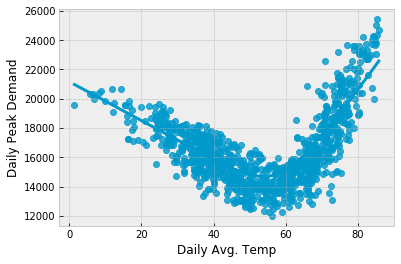

In [11]:

# A. Daily Peak versus Avg. Daily Temp
peak = data.groupby('date')['mw'].max()
avgtemp = data.groupby('date')['tempf'].mean()

sns.regplot(avgtemp, peak, lowess = True, color = (0,0.6,0.8, 0.6))
plt.ylabel('Daily Peak Demand')
plt.xlabel('Daily Avg. Temp')
plt.show()

0 to 5F
5 to 10F
10 to 15F
15 to 20F
20 to 25F
25 to 30F
30 to 35F
35 to 40F
40 to 45F
45 to 50F
50 to 55F
55 to 60F
60 to 65F
65 to 70F
70 to 75F
75 to 80F
80 to 85F
85 to 90F
90 to 95F
95 to 100F


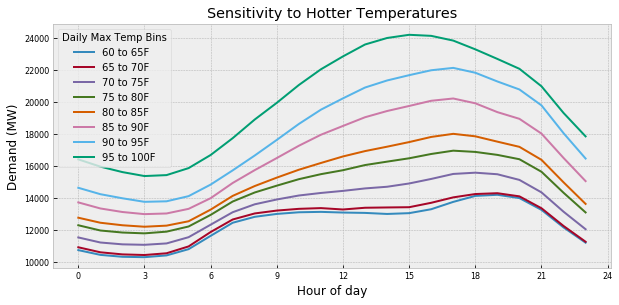

In [12]:

#B. Hourly load by temperature bins
#Create max temp bins
bins = list(range(5,105,5))
names = []
for bin in bins:
    lb = bin-5
    name = f'{lb} to {bin}F' 
    print(name)
    names.append(name)
del names[0]   

data["bins_maxtemp"] = pd.cut(data["tempf_peak"], bins, labels = names)

  
#Plot loads for cooling homes (AC)
bindata = data.loc[data.tempf_peak>=60].pivot_table(
        index =    'hour', columns = 'bins_maxtemp', values = 'mw', aggfunc = 'mean')

bindata.plot(title = "Sensitivity to Hotter Temperatures", figsize = [10, 4.5], fontsize =8)
plt.xlabel("Hour of day")
plt.ylabel("Demand (MW)") 
plt.xticks(np.arange(0,25,3))
plt.legend(loc = 'best', title = "Daily Max Temp Bins")
plt.show()

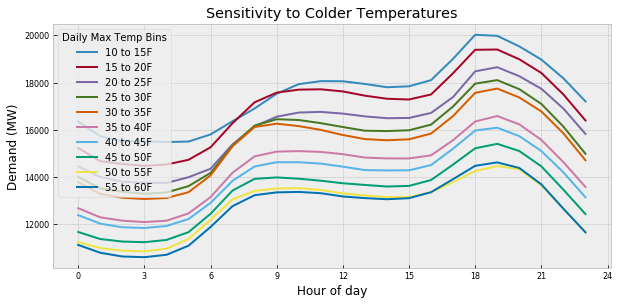

In [13]:
#Plot loads for Heating home (AC)
bindata = data.loc[data.tempf_peak<60].pivot_table(
        index = 'hour', columns = 'bins_maxtemp', values = 'mw', aggfunc = 'mean')

bindata.plot(title = "Sensitivity to Colder Temperatures", figsize = [10, 4.5], fontsize =8)
plt.xlabel("Hour of day")
plt.ylabel("Demand (MW)") 
plt.xticks(np.arange(0,25,3))
plt.legend(loc = 'best', title = "Daily Max Temp Bins")
plt.show()


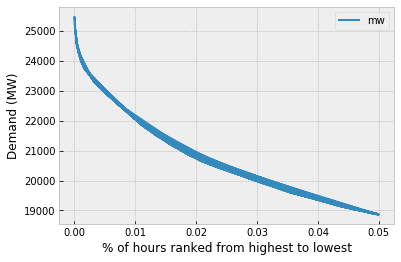

In [14]:
#C. Load duration curve

data['rank'] = data.mw.rank(method= 'first', ascending=False)
data['pctrank'] = data.mw.rank(method= 'first', ascending=False, pct = True)

data.loc[data.pctrank < 0.05].plot.line(x = 'pctrank', y = 'mw')
plt.xlabel("% of hours ranked from highest to lowest")
plt.ylabel("Demand (MW)") 
plt.show()


In [15]:
# Correlation matrix
corr_matrix = data.corr()
corr_matrix["mw"].sort_values(ascending=False)



mw               1.000000
mw_24hrlag       0.873453
mw_3hrlag        0.808009
mw_avg           0.721508
mw_peak          0.721508
mw_weeklag       0.718367
cdh65            0.599506
hdh65            0.472922
hdd60            0.472922
cdd60            0.472922
hour             0.446150
tempf            0.214856
tempc            0.214856
tempf_3hrma      0.207954
tempf_24hrlag    0.203092
tempf_3hrlag     0.183032
tempf_peak       0.138040
tempf_avg        0.135423
tempf_24hrma     0.131762
windspeed        0.125921
tempf_weeklag    0.113716
dewpoint         0.112505
skycond          0.045124
month            0.035124
dayofyear        0.032933
Unnamed: 0       0.024490
year            -0.036549
windir          -0.041770
dayofweek       -0.176171
pctrank         -0.954993
rank            -0.954993
usaf                  NaN
wban                  NaN
Name: mw, dtype: float64

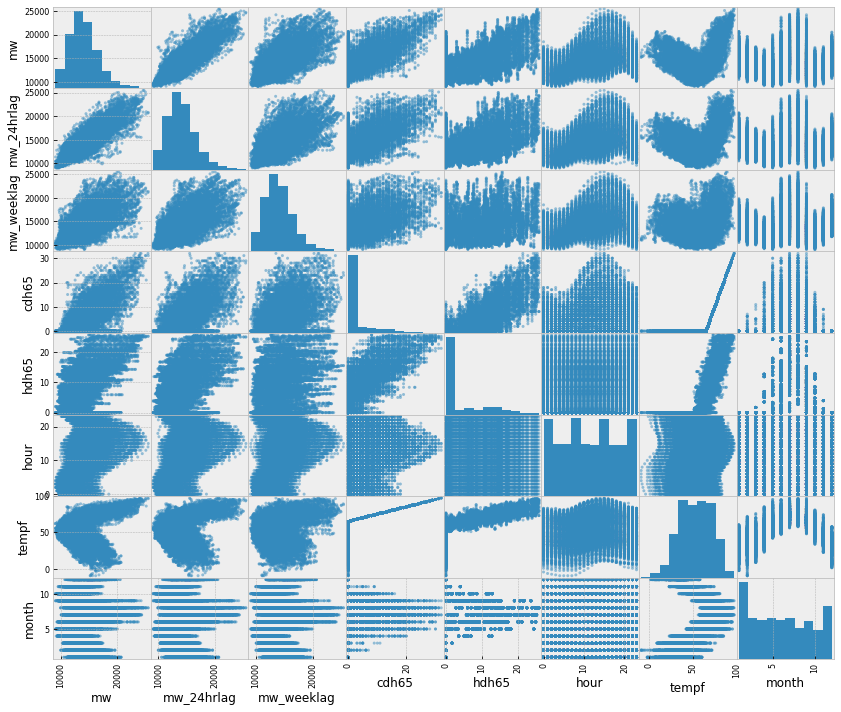

In [18]:
#from pandas.plotting import scatter_matrix
col_list = ['mw', 'mw_24hrlag', 'mw_weeklag', 'cdh65', 'hdh65', 'hour', 'tempf', 'month' ]
scatter_matrix(data[col_list], figsize=(14, 12))
plt.show()

# Prep Data for Model Fitting

# Linear Regression (Loop by Hour if we can)

# Net Elastic Regression (or LASSO or Ridge)

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Support Vector Machine Regression